In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
from pprint import pprint

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
    
# Print the city count to confirm sufficient count
len(cities)

591

## Perform API Calls

In [7]:
# Building the DataFrame plotting later
file = pd.DataFrame(np.array(cities).reshape(len(cities), 1), columns = list("a"))
weather = file.rename(columns={"a":"City"})
weather["City Name"] = ""
weather["City ID"] = ""
weather["Temperature (F)"] = ""
weather["Humidity (%)"] = ""
weather["Cloudiness (%)"] = ""
weather["Wind Speed (mph)"] = ""
weather["Latitude"] = ""

In [8]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?"

units = "imperial"

params = {
    "appid": api_key,
    "units": units,
}

for index, row in weather.iterrows():
    city = row["City"]
    params["q"] = city
    
    response = requests.get(url, params=params).json()
    
    try:
        weather.loc[index, "City Name"] = response["name"]
        weather.loc[index, "City ID"] = response["id"]
        weather.loc[index, "Temperature (F)"] = response["main"]["temp"]
        weather.loc[index, "Humidity (%)"] = response["main"]["humidity"]
        weather.loc[index, "Cloudiness (%)"] = response["clouds"]["all"]
        weather.loc[index, "Wind Speed (mph)"] = response["wind"]["speed"]
        weather.loc[index, "Latitude"] = response["coord"]["lat"]
    except KeyError:
        weather.loc[index, "City Name"] = "NaN"

In [9]:
# Cleaning up the data
weather_clean = weather.loc[weather["City Name"] != "NaN", :]
weather_clean.head()
weather_data = weather_clean.set_index("City")
weather_data = weather_data.drop_duplicates(keep=False)
weather_data.index.name = None
weather_data.head()

,City Name,City ID,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Latitude
mahebourg,Mahebourg,934322,71.6,78,75,6.93,-20.41
ilulissat,Ilulissat,3423146,33.8,80,92,11.41,69.22
albany,Albany,5106834,52.84,92,20,3.09,42.65
busselton,Busselton,2075265,64.83,89,88,15.5,-33.64
pevek,Pevek,2122090,44.76,87,76,7.67,69.7


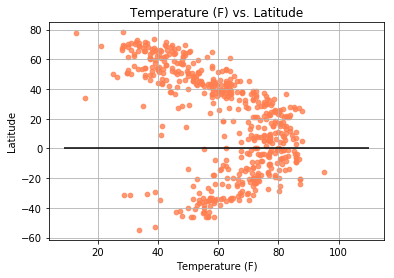

In [10]:
# Plot 1
plt.scatter(weather_data["Temperature (F)"], weather_data["Latitude"], color="coral", s=22, edgecolor="coral", alpha=0.8)
plt.xlabel("Temperature (F)")
plt.ylabel("Latitude")
plt.title("Temperature (F) vs. Latitude")
plt.hlines(0, 9, 110)
plt.grid()
plt.savefig("Images/temp_lat.png")
plt.show()

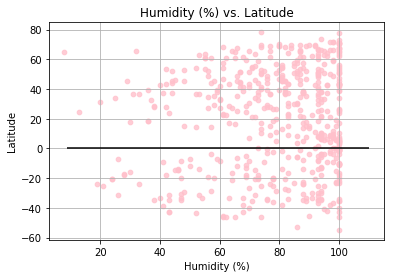

In [11]:
# Plot 2
plt.scatter(weather_data["Humidity (%)"], weather_data["Latitude"], color="pink", s=22, edgecolor="pink", alpha=0.8)
plt.xlabel("Humidity (%)")
plt.ylabel("Latitude")
plt.title("Humidity (%) vs. Latitude")
plt.hlines(0, 9, 110)
plt.grid()
plt.savefig("Images/humidity_lat.png")
plt.show()

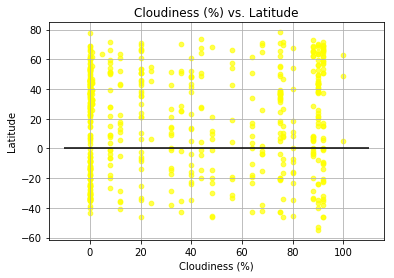

In [12]:
# Plot 3
plt.scatter(weather_data["Cloudiness (%)"], weather_data["Latitude"], color="yellow", s=22, edgecolor="yellow", alpha=0.7)
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude")
plt.title("Cloudiness (%) vs. Latitude")
plt.hlines(0, -10, 110)
plt.grid()
plt.savefig("Images/cloud_lat.png")
plt.show()

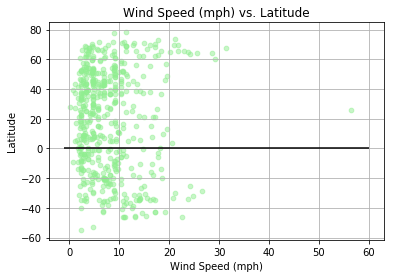

In [13]:
# Plot 4
plt.scatter(weather_data["Wind Speed (mph)"], weather_data["Latitude"], color="lightgreen", s=22, edgecolor="lightgreen", alpha=0.5)
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Latitude")
plt.title("Wind Speed (mph) vs. Latitude")
plt.hlines(0, -1, 60)
plt.grid()
plt.savefig("Images/wind_lat.png")
plt.show()

In [14]:
# Formatting data points
weather_data["Humidity (%)"] = weather_data["Humidity (%)"].map("{:.1f}%".format)
weather_data["Cloudiness (%)"] = weather_data["Cloudiness (%)"].map("{:.1f}%".format)

In [15]:
# Saving the DataFrame to CSV
weather_data.to_csv("weather_data.csv")